In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import warnings
warnings.filterwarnings("ignore")

#import ML preprocessing packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [307]:
concrete_data = pd.read_csv('Concrete_Data_Yeh.csv')

In [308]:
concrete_data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [309]:
#Checking the shape—i.e. size—of the data.

concrete_data.shape


(1030, 9)

In [310]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


**Cement (component 1)** -- quantitative -- kg in a m3 mixture -- Input Variable

**Blast Furnace Slag (component 2)** -- quantitative -- kg in a m3 mixture -- Input Variable

**Fly Ash (component 3)** -- quantitative -- kg in a m3 mixture -- Input Variable

**Water (component 4)** -- quantitative -- kg in a m3 mixture -- Input Variable

**Superplasticizer (component 5)** -- quantitative -- kg in a m3 mixture -- Input Variable

**Coarse Aggregate (component 6)** -- quantitative -- kg in a m3 mixture -- Input Variable

**Fine Aggregate (component 7)** -- quantitative -- kg in a m3 mixture -- Input Variable

**Age** -- quantitative -- Day (1~365) -- Input Variable

**Concrete Compressive Strength** -- quantitative -- MPa -- Output Variable






In [311]:
#look at distribution of data
concrete_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [312]:
concrete_sub_csMPa = ['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']
len(concrete_sub_csMPa)
concrete_data.shape

(1030, 9)

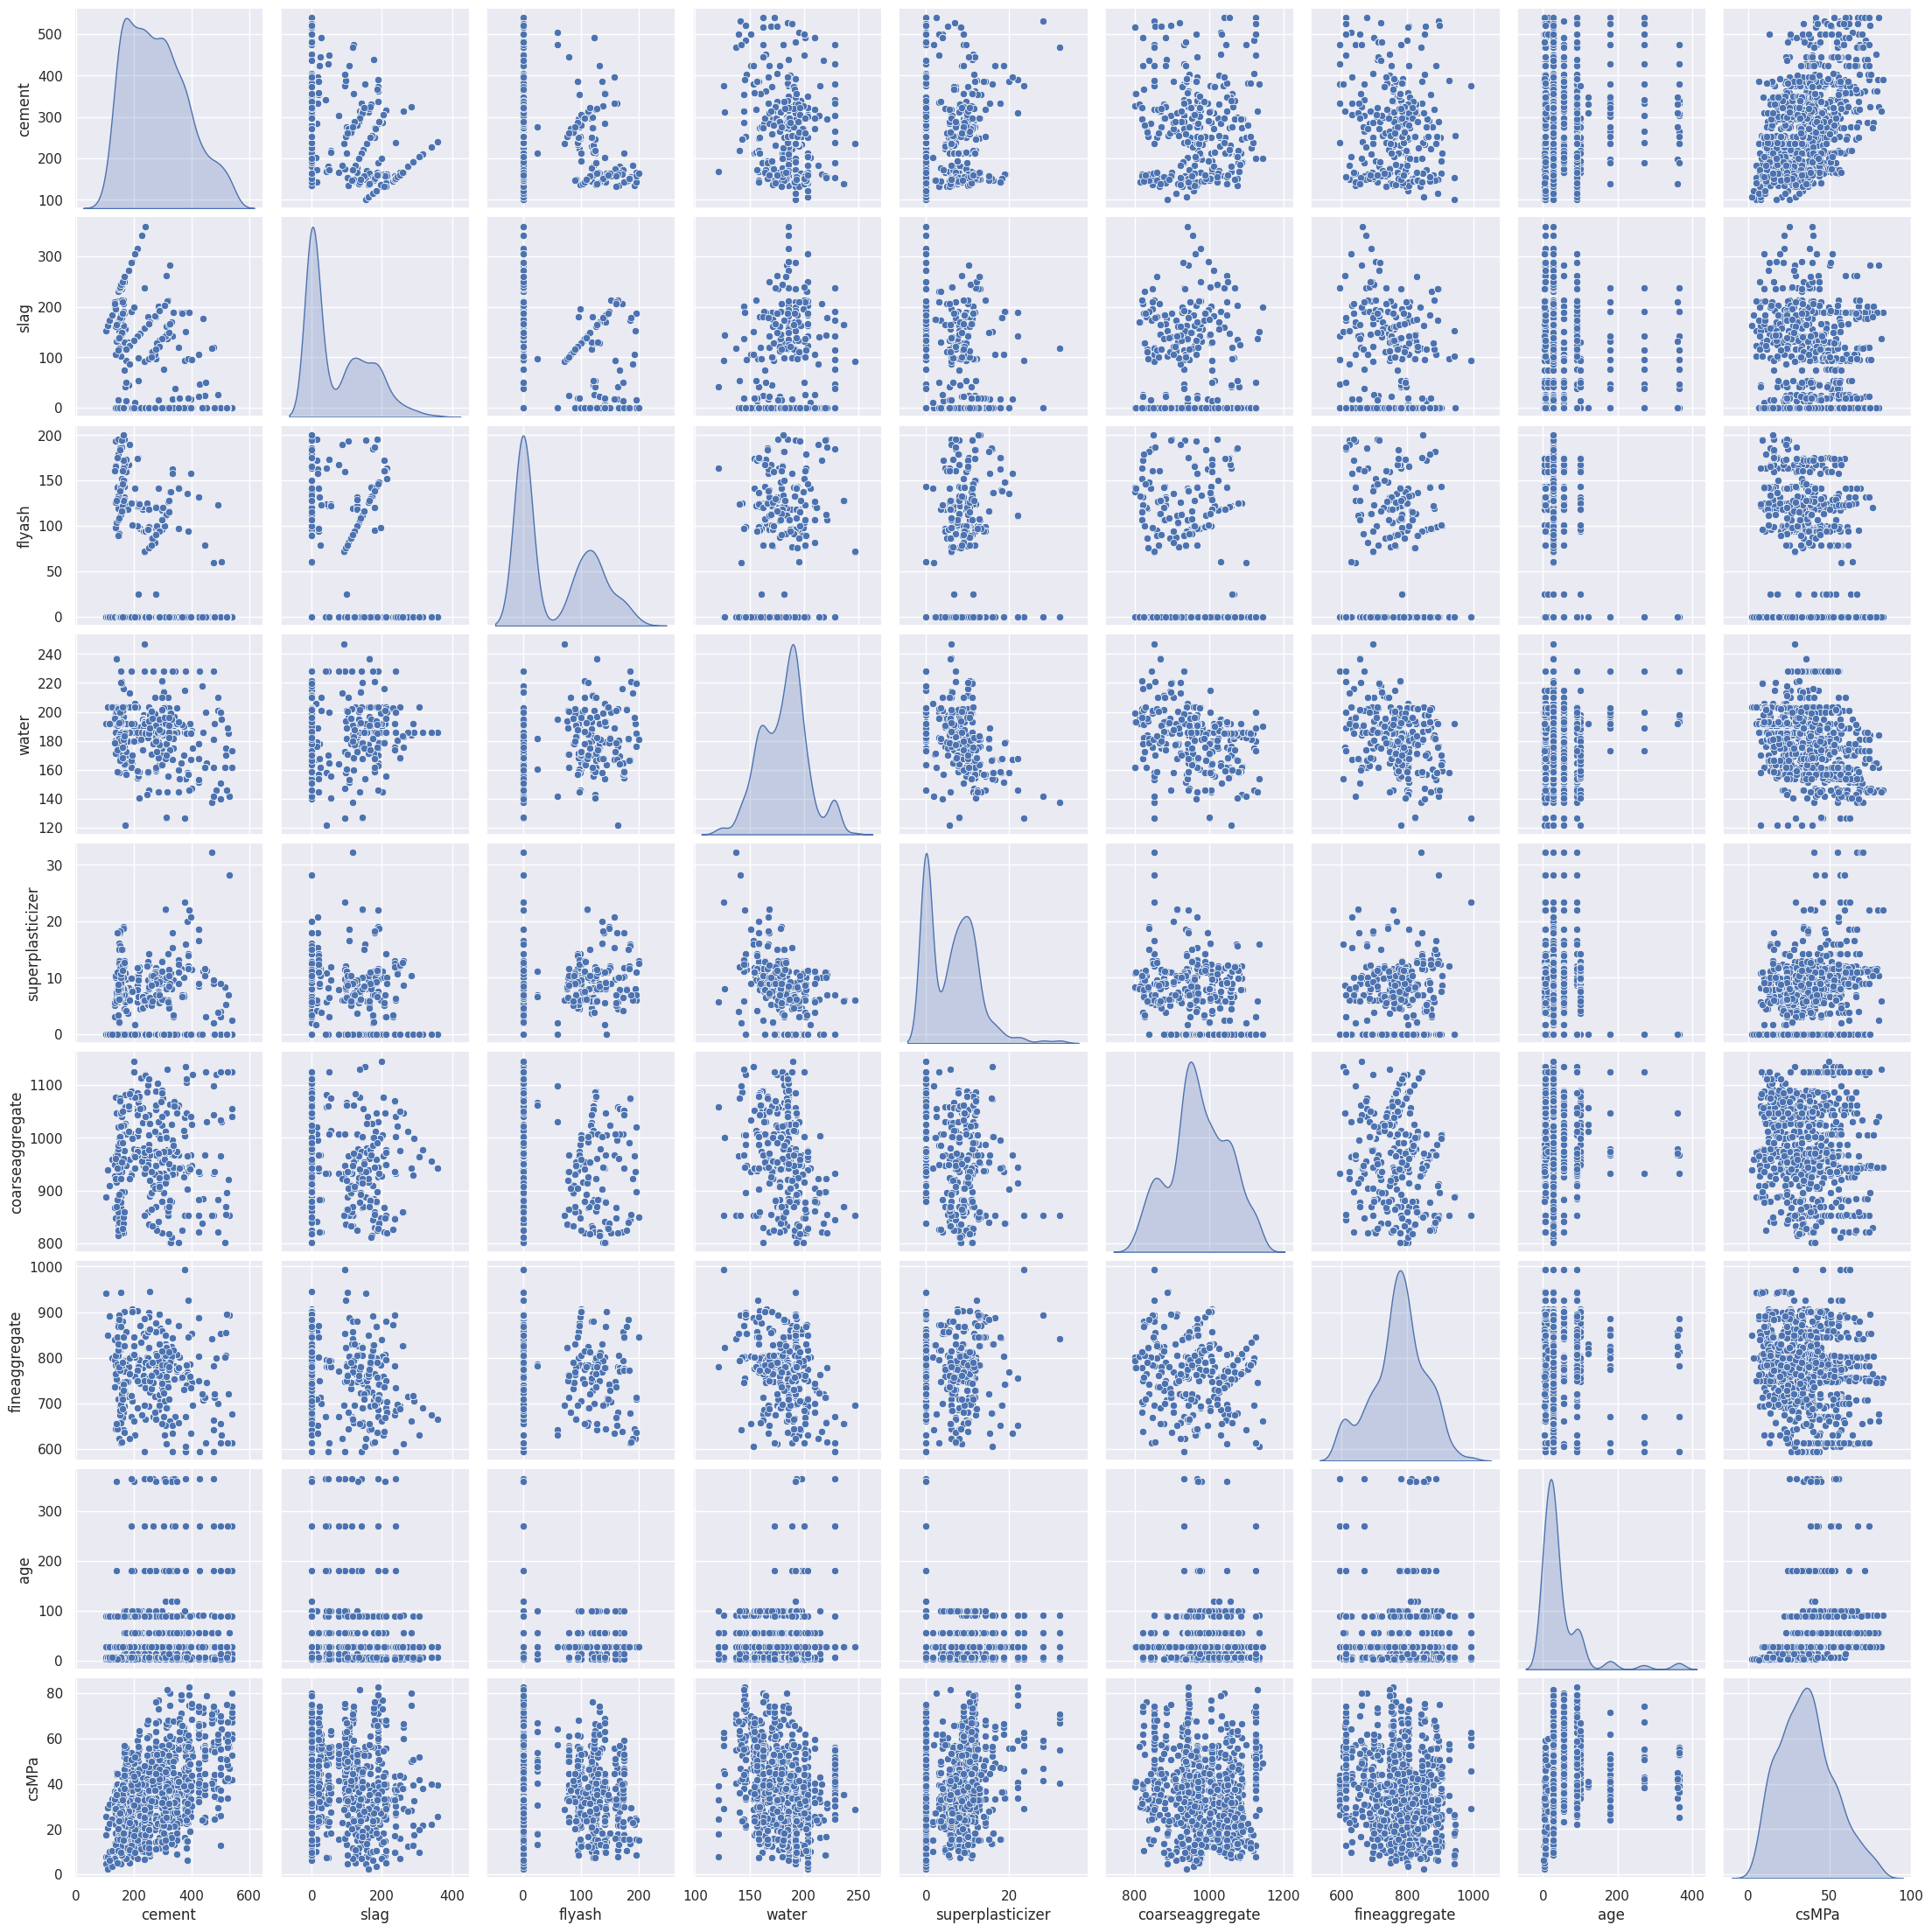

In [313]:
sns.pairplot(concrete_data, diag_kind='kde')

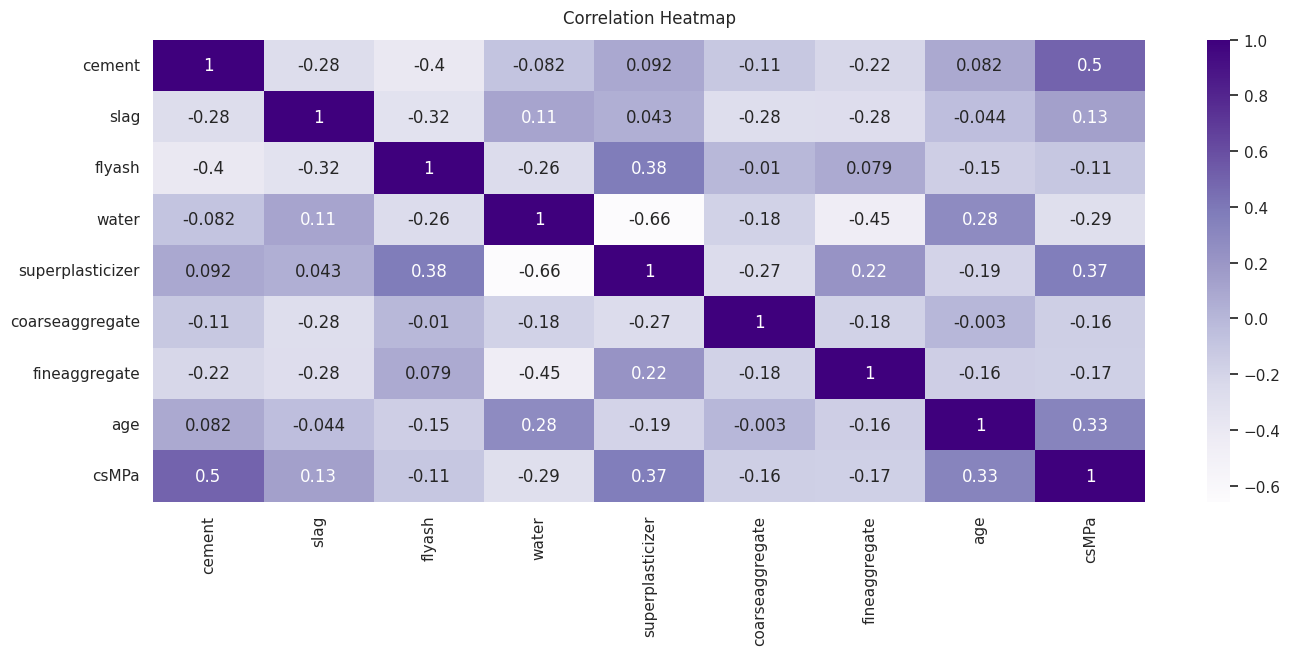

In [314]:
plt.figure(figsize=(16, 6))
sns.heatmap(concrete_data.corr(), annot=True, cmap='Purples')
plt.title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

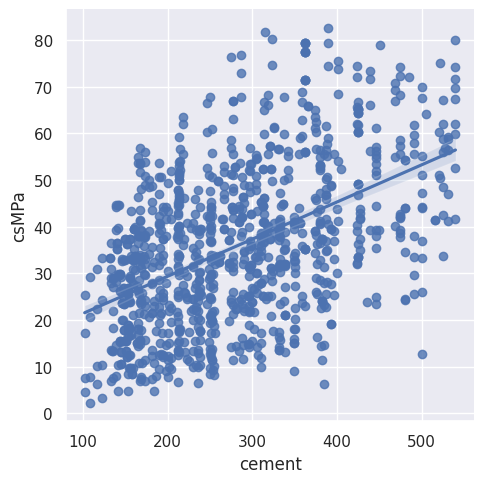

In [315]:
#plot strongest linear correlation
sns.lmplot(x='cement', y='csMPa',data=concrete_data)
plt.show()

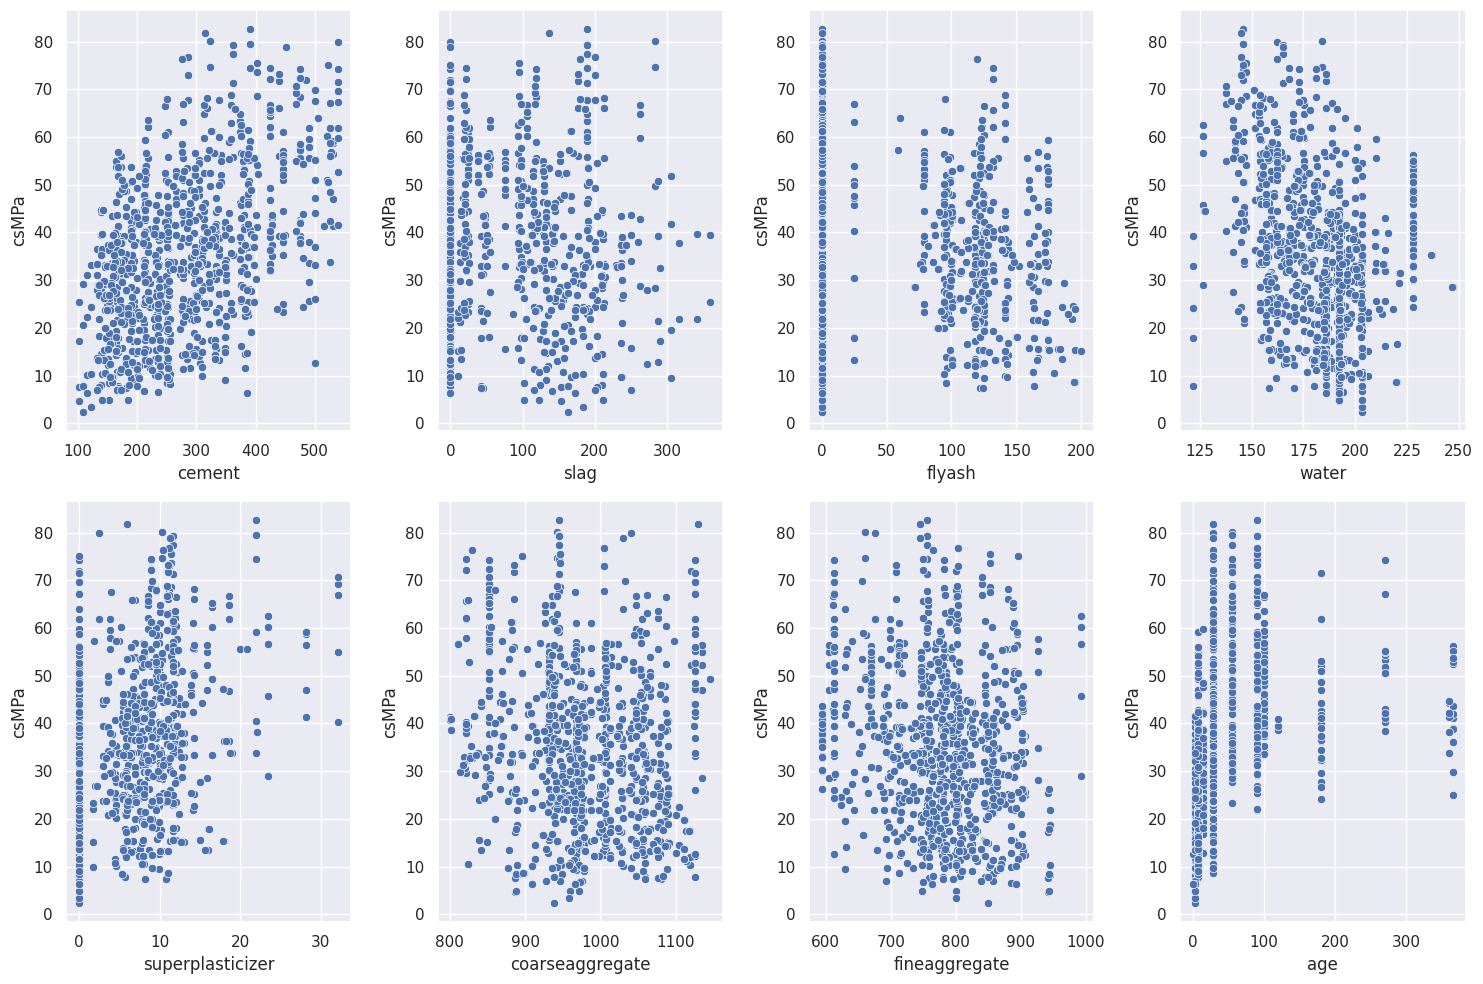

In [316]:
fig, axes = plt.subplots(2, 4, figsize=(15, 10))
for col, ax in zip(concrete_sub_csMPa, axes.flatten()):
    sns.scatterplot(x=col, y='csMPa', data=concrete_data, ax=ax)
plt.tight_layout()

In [317]:
#top most correlated feature pairs
concrete_data.corr().abs().unstack().sort_values(ascending=0)[9::2]

water             superplasticizer    0.657533
csMPa             cement              0.497832
water             fineaggregate       0.450661
cement            flyash              0.397467
superplasticizer  flyash              0.377503
csMPa             superplasticizer    0.366079
age               csMPa               0.328873
flyash            slag                0.323580
csMPa             water               0.289633
slag              coarseaggregate     0.283999
fineaggregate     slag                0.281603
age               water               0.277618
cement            slag                0.275216
coarseaggregate   superplasticizer    0.265999
flyash            water               0.256984
fineaggregate     cement              0.222718
superplasticizer  fineaggregate       0.222691
                  age                 0.192700
coarseaggregate   water               0.182294
                  fineaggregate       0.178481
fineaggregate     csMPa               0.167241
csMPa        

In [318]:
X = concrete_data.drop('csMPa', axis=1)
y = concrete_data['csMPa']

#train/test split 75% training, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=1)

#numerical pipeline
scaler=MinMaxScaler()

#apply scaler to numerical data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# standardize the data
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [319]:
class CustomLinearRegression(BaseEstimator):
    def __init__(self, learning_rate=0.01, n_iterations=1000, epsilon=1e-5):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.epsilon = epsilon
        self.weights = None
        self.bias = None
        self.loss_history = []
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        delta = np.ones_like(self.weights)
        iteration = 0
        
        while np.linalg.norm(delta) > self.epsilon and iteration < self.n_iterations:
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # compute loss and gradients
            loss = 1/(2*n_samples) * np.sum(np.square(y_predicted - y))
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            # update parameters and loss history
            delta = self.learning_rate * dw
            self.weights -= delta
            self.bias -= self.learning_rate * db
            self.loss_history.append(loss)
            
            iteration += 1
    
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

In [320]:
# write evaluation function with printing results
def evaluate(y_true, y_pred, verbose=False):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    if verbose:
        print(f'MSE: {mse:.3f}\nRMSE: {rmse:.3f}\nMAE: {mae:.3f}\nR2: {r2:.3f}')
    
    return mse, rmse, mae, r2

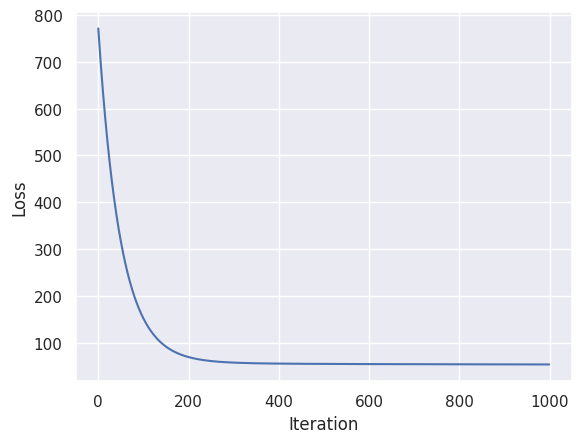

In [321]:
# train the model using custom linear regression
custom_lr = CustomLinearRegression()
custom_lr.fit(X_train_scaled, y_train)

# plot the loss history
plt.plot(custom_lr.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [322]:
# Predict on the train and test set
y_train_pred_custom = custom_lr.predict(X_train_scaled)
y_test_pred_custom = custom_lr.predict(X_test_scaled)

# Evaluate predictions on the train and test set
train_results = evaluate(y_train, y_train_pred_custom)
test_results = evaluate(y_test, y_test_pred_custom)

# Create a DataFrame to store the results
results = pd.DataFrame(
    [train_results, test_results],
    index=pd.MultiIndex.from_tuples(
        [('Custom lr', 'Train'), ('Custom lr', 'Test')],
        names=['Model', 'Set']
    ),
    columns=['MSE', 'RMSE', 'MAE', 'R2']
)
results

MSE       RMSE       MAE        R2
Model     Set                                             
Custom lr Train  106.989055  10.343551  8.275419  0.621212
          Test   119.546363  10.933726  8.591496  0.551822

In [323]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

models = {
    'Linear regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    results.loc[(name, 'Train'), :] = evaluate(y_train, y_train_pred)
    results.loc[(name, 'Test'), :] = evaluate(y_test, y_test_pred)

results

MSE       RMSE       MAE        R2
Model             Set                                             
Custom lr         Train  106.989055  10.343551  8.275419  0.621212
                  Test   119.546363  10.933726  8.591496  0.551822
Linear regression Train  103.991404  10.197618  8.047260  0.631825
                  Test   118.786522  10.898923  8.585446  0.554670
Ridge             Train  103.999865  10.198032  8.056547  0.631795
                  Test   118.636950  10.892059  8.583418  0.555231
Lasso             Train  117.308461  10.830903  8.777180  0.584676
                  Test   119.339615  10.924267  8.619667  0.552597

In [324]:
# hyperparameter tuning using cross validation
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_iterations': [1000, 2500, 3000],
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(
    estimator=CustomLinearRegression(),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
).fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding score
best_params, best_score = grid_search.best_params_, np.sqrt(-grid_search.best_score_)
print(f'Best parameters: {best_params}\nBest score: {best_score:.3f}')

Best parameters: {'learning_rate': 0.1, 'n_iterations': 1000}
Best score: 10.321


In [325]:
# train the model using best parameters
best_custom_lr = CustomLinearRegression(**grid_search.best_params_)
best_custom_lr.fit(X_train_scaled, y_train)

# predict on the train and test set
y_train_pred_custom = best_custom_lr.predict(X_train_scaled)
y_test_pred_custom = best_custom_lr.predict(X_test_scaled)

results.loc[('Best_Custom lr', 'Train'), :] = evaluate(y_train, y_train_pred_custom)
results.loc[('Best_Custom lr', 'Test'), :] = evaluate(y_test, y_test_pred_custom)

results

MSE       RMSE       MAE        R2
Model             Set                                             
Custom lr         Train  106.989055  10.343551  8.275419  0.621212
                  Test   119.546363  10.933726  8.591496  0.551822
Linear regression Train  103.991404  10.197618  8.047260  0.631825
                  Test   118.786522  10.898923  8.585446  0.554670
Ridge             Train  103.999865  10.198032  8.056547  0.631795
                  Test   118.636950  10.892059  8.583418  0.555231
Lasso             Train  117.308461  10.830903  8.777180  0.584676
                  Test   119.339615  10.924267  8.619667  0.552597
Best_Custom lr    Train  103.999044  10.197992  8.054767  0.631798
                  Test   118.696341  10.894785  8.585124  0.555008

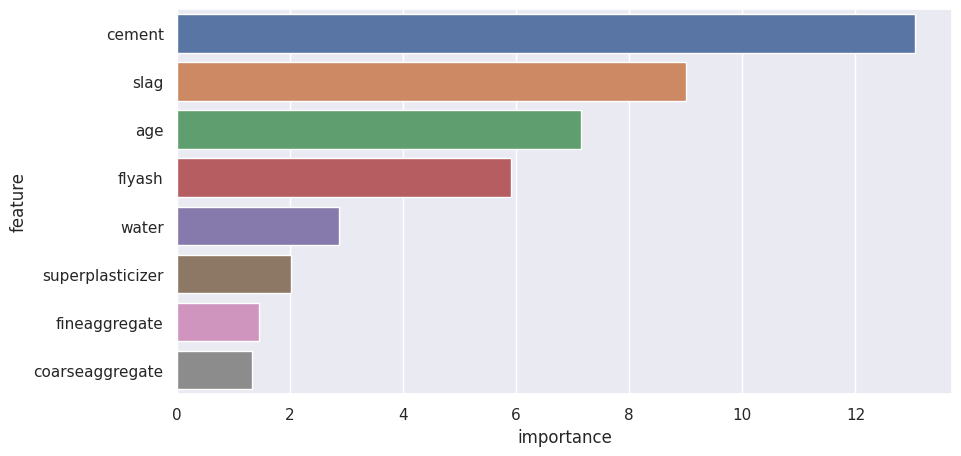

In [326]:
# Compute feature importance and create a DataFrame
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(best_custom_lr.weights)}).sort_values('importance', ascending=False)

# Plot feature importance using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.show()